In [8]:
import numpy as np
import matplotlib.pyplot as plot

In [9]:
x = np.array([4,6,2,3,5])
y = np.array([20,15,12,13,10])

yfx = 2*x + 1

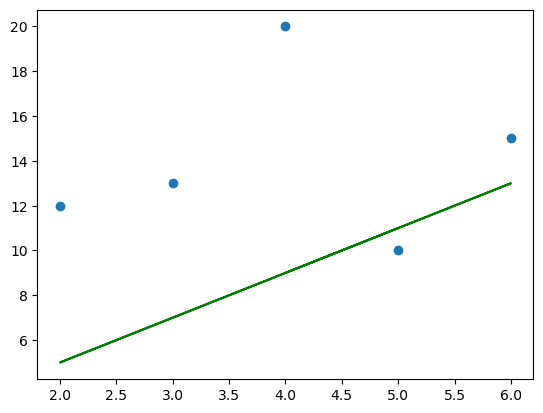

In [10]:
plot.scatter(x,y)
plot.plot(x, yfx, color="green")

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
print(r2_score(y,yfx))

-2.6379310344827585


In [13]:
from sklearn import datasets